# 1 Housekeeping

### 1.1 Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1.2 Load data

In [3]:
#set directory
train_directory = "C:/Users/Meyke/WiDS/data/train.csv"
test_directory = "C:/Users/Meyke/WiDS/data/test.csv"
imputed_data_directory = "C:/Users/Meyke/WiDS/data/clean_data_2801_imputed_star_rating_and_generous_building_id.csv"

In [4]:
#import data
raw_train = pd.read_csv(train_directory)
raw_test = pd.read_csv (test_directory)

#version 14/1/22 - imputed dataset
df = pd.read_csv(imputed_data_directory)

In [5]:
df.columns

Index(['Unnamed: 0', 'year_factor', 'state_factor', 'building_class',
       'facility_type', 'floor_area', 'elevation', 'january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inche

**Drop, rename and set data types**

In [6]:
#drop redundant columns
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_NE,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,1,0,0,0,1,0,0,0,food_sales_service,1942.0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,0,0,0,1,0,0,0,distribution_shipping,1955.0
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,0,0,0,0,1,0,0,0,retail,1951.0
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,0,0,0,0,1,0,0,0,eduation,1980.0
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,1,0,0,0,1,0,0,0,distribution_shipping,1985.0


In [7]:
df['year_built'] = df['year_built'].astype(int)
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_NE,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,1,0,0,0,1,0,0,0,food_sales_service,1942
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,0,0,0,1,0,0,0,distribution_shipping,1955
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,0,0,0,0,1,0,0,0,retail,1951
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,0,0,0,0,1,0,0,0,eduation,1980
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,1,0,0,0,1,0,0,0,distribution_shipping,1985


# 2 Feature engineering

### 2.1 Floor area binned

20012022_Submission_8

In [7]:
#create bins for floor area
cut_labels = [1, 2, 3, 4, 5]
cut_bins = [0,  75000, 100000, 200000, 500000, 1000000000]
df['floor_area_binned'] = pd.cut(df['floor_area'], bins=cut_bins, labels=cut_labels)
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,0,0,0,1,0,0,0,food_sales_service,1942,1
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,0,0,1,0,0,0,distribution_shipping,1955,4
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,0,0,0,1,0,0,0,retail,1951,4
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,0,0,0,1,0,0,0,eduation,1980,1
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,0,0,0,1,0,0,0,distribution_shipping,1985,1


In [8]:
df[df['floor_area_binned'].isna()]

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned


In [9]:
df['floor_area_binned'] = df['floor_area_binned'].fillna(1)

### 2.2 Energy intensity floor area

20012022_Submission_4

In [10]:
#split into (new) train and test set based on id
df_train = df[df["id"].isin(raw_train["id"])]
df_test = df[df["id"].isin(raw_test["id"])]

In [11]:
#calculate q1
q1 = df_train[['floor_area_binned', 'site_eui']]
q1= q1.groupby('floor_area_binned')['site_eui'].quantile(0.25).reset_index()
q1  = q1.rename(columns ={'site_eui': 'q1'})

#calculate q2
q3 = df_train[['floor_area_binned', 'site_eui']]
q3= q3.groupby('floor_area_binned')['site_eui'].quantile(0.75).reset_index()
q3  = q3.rename(columns ={'site_eui': 'q3'})

#calcualte 'normal' range
ranges = q1.merge(q3, how = 'left', on = 'floor_area_binned')
ranges['iqr'] = ranges['q3'] - ranges ['q1']
ranges['left_border'] = ranges['q1'] - 0.1 * ranges['iqr']
ranges ['right_border'] = ranges['q3'] + 1.1* ranges['iqr']

#merge
df_train = df_train.merge(ranges[['floor_area_binned', 'left_border', 'right_border']], how = 'left', on = 'floor_area_binned')


In [12]:
#calculate energy intensity in train set
df_train['energy_intensity_floor_area'] = np.where( df_train['site_eui'] < df_train['left_border'], 1, 2)
df_train['energy_intensity_floor_area'] = np.where (df_train['site_eui']> df_train['right_border'], 3, df_train['energy_intensity_floor_area'])

#drop redundant
df_train = df_train.drop(['left_border', 'right_border'],axis=1)

In [13]:
#groupby building id and keep for each building the last record (based on year_factor)
building_id = df_train [['building_id', 'year_factor', 'energy_intensity_floor_area']]
building_id = building_id.sort_values(['building_id', 'year_factor'])
building_id = building_id.groupby('building_id')['energy_intensity_floor_area'].last().reset_index()

In [14]:
#merge based on building id, and fill missing recors (around 700) with 2
df_test  = df_test.drop(['site_eui'],axis=1)
df_test = df_test.merge(building_id, how = 'left', on = 'building_id').fillna(2)
df_test['energy_intensity_floor_area'] = df_test['energy_intensity_floor_area'].astype('int')
df_test.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,2.4,38,50.596774,64,40,...,0,0,0,0,0,0,food_sales_service,1994,1,3
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,45.7,38,50.596774,64,40,...,0,0,0,0,0,0,food_sales_service,1961,1,3
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,59.1,38,50.596774,64,40,...,0,0,0,0,0,0,food_sales_service,1950,1,2
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,35.4,38,50.596774,64,40,...,0,0,0,0,0,0,food_sales_service,1971,2,3
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1.8,38,50.596774,64,40,...,0,1,0,0,0,1,food_sales_service,1942,1,3


In [15]:
#append train and test
df = df_train.append(df_test)
df.head(2)

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,0,0,1,0,0,0,food_sales_service,1942,1,3
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,0,1,0,0,0,distribution_shipping,1955,4,1


### 2.3 Energy intenstiy built year

20012022_Submission_11

In [16]:
#create built year bins
cut_labels = [1, 2, 3, 4, 5]
cut_bins = [0,  1930, 1950, 1970, 1990, 2022]
df['year_built_binned'] = pd.cut(df['year_built'], bins=cut_bins, labels=cut_labels)
df['year_built_binned'] = df['year_built_binned'].astype('int')


In [17]:
#split into (new) train and test set based on id
df_train = df[df["id"].isin(raw_train["id"])]
df_test = df[df["id"].isin(raw_test["id"])]

In [18]:
#set iqr to 1.2
q1 = df_train[['year_built_binned', 'site_eui']]
q1= q1.groupby('year_built_binned')['site_eui'].quantile(0.25).reset_index()
q1  = q1.rename(columns ={'site_eui': 'q1'})

q3 = df_train[['year_built_binned', 'site_eui']]
q3= q3.groupby('year_built_binned')['site_eui'].quantile(0.75).reset_index()
q3  = q3.rename(columns ={'site_eui': 'q3'})

ranges = q1.merge(q3, how = 'left', on = 'year_built_binned')
ranges['iqr'] = ranges['q3'] - ranges ['q1']

#first borders:  1qr =1.2
ranges['left_border'] = ranges['q1'] - 0.1 * ranges['iqr']
ranges ['right_border'] = ranges['q3'] + 1.5 * ranges['iqr']

#merge
df_train = df_train.merge(ranges[['year_built_binned', 'left_border', 'right_border']], how = 'left', on = 'year_built_binned')

In [19]:
#calculate energy intenstiy built year in train set
df_train['energy_intensity_built_year'] = np.where( df_train['site_eui'] < df_train['left_border'], 1, 2)
df_train['energy_intensity_built_year'] = np.where (df_train['site_eui']> df_train['right_border'], 3, df_train['energy_intensity_built_year'])

#drop redundant
df_train = df_train.drop(['year_built_binned', 'left_border', 'right_border'], axis=1)

df_train.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,0,1,0,0,0,food_sales_service,1942,1,3,3
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,1,0,0,0,distribution_shipping,1955,4,1,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,0,1,0,0,0,retail,1951,4,1,1
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,0,1,0,0,0,eduation,1980,1,2,2
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,0,1,0,0,0,distribution_shipping,1985,1,1,1


In [20]:
#groupby building id and keep for each building the last record (based on year_factor)
building_id = df_train [['building_id', 'year_factor', 'energy_intensity_built_year']]
building_id = building_id.sort_values(['building_id', 'year_factor'])
building_id = building_id.groupby('building_id')['energy_intensity_built_year'].last().reset_index()


In [21]:
#merge based on building id, and fill missing recors (around 700) with 2
df_test = df_test.drop('site_eui', axis=1)
df_test = df_test.merge(building_id, how = 'left', on = 'building_id').fillna(2)
df_test['energy_intensity_built_year'] = df_test['energy_intensity_built_year'].astype('int')

#drop redundant
df_test = df_test.drop(['year_built_binned'],axis=1)
df_test.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,2.4,38,50.596774,64,40,...,0,0,0,0,0,food_sales_service,1994,1,3,2
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,45.7,38,50.596774,64,40,...,0,0,0,0,0,food_sales_service,1961,1,3,3
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,59.1,38,50.596774,64,40,...,0,0,0,0,0,food_sales_service,1950,1,2,2
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,35.4,38,50.596774,64,40,...,0,0,0,0,0,food_sales_service,1971,2,3,3
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1.8,38,50.596774,64,40,...,1,0,0,0,1,food_sales_service,1942,1,3,3


In [22]:
#append train and test
df = df_train.append(df_test)
df.head(2)

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,0,1,0,0,0,food_sales_service,1942,1,3,3
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,1,0,0,0,distribution_shipping,1955,4,1,1


### 2.4 Energy intenstiy facility type

22012022-Submission_3

In [23]:
#split into (new) train and test set based on id
df_train = df[df["id"].isin(raw_train["id"])]
df_test = df[df["id"].isin(raw_test["id"])]

In [24]:
#calculate q1
q1 = df_train[['facility_type', 'site_eui']]
q1= q1.groupby('facility_type')['site_eui'].quantile(0.25).reset_index()
q1  = q1.rename(columns ={'site_eui': 'q1'})

#calculate q2
q3 = df_train[['facility_type', 'site_eui']]
q3= q3.groupby('facility_type')['site_eui'].quantile(0.75).reset_index()
q3  = q3.rename(columns ={'site_eui': 'q3'})

#calcualte 'normal' range
ranges = q1.merge(q3, how = 'left', on = 'facility_type')
ranges['iqr'] = ranges['q3'] - ranges ['q1']
ranges['left_border'] = ranges['q1'] - 0.1 * ranges['iqr']
ranges ['right_border'] = ranges['q3'] + 1.1* ranges['iqr']

#merge
df_train = df_train.merge(ranges[['facility_type', 'left_border', 'right_border']], how = 'left', on = 'facility_type')

In [25]:
#calculate energy intensity in train set
df_train['energy_intensity_facility_type'] = np.where( df_train['site_eui'] < df_train['left_border'], 1, 2)
df_train['energy_intensity_facility_type'] = np.where (df_train['site_eui']> df_train['right_border'], 3, df_train['energy_intensity_facility_type'])

#drop redundant
df_train = df_train.drop(['left_border', 'right_border'],  axis=1)
df_train.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,1,0,0,0,food_sales_service,1942,1,3,3,2
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,1,0,0,0,distribution_shipping,1955,4,1,1,2
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,1,0,0,0,retail,1951,4,1,1,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,1,0,0,0,eduation,1980,1,2,2,1
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,1,0,0,0,distribution_shipping,1985,1,1,1,1


In [26]:
#groupby building id and keep for each building the last record (based on year_factor)
building_id = df_train [['building_id', 'year_factor', 'energy_intensity_facility_type']]
building_id = building_id.sort_values(['building_id', 'year_factor'])
building_id = building_id.groupby('building_id')['energy_intensity_facility_type'].last().reset_index()

In [27]:
#merge based on building id, and fill missing recors (around 700) with 2
df_test = df_test.drop('site_eui', axis=1)
df_test = df_test.merge(building_id, how = 'left', on = 'building_id').fillna(2)
df_test['energy_intensity_facility_type'] = df_test['energy_intensity_facility_type'].astype ('int')

df_test.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,2.4,38,50.596774,64,40,...,0,0,0,0,food_sales_service,1994,1,3,2,1
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,45.7,38,50.596774,64,40,...,0,0,0,0,food_sales_service,1961,1,3,3,2
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,59.1,38,50.596774,64,40,...,0,0,0,0,food_sales_service,1950,1,2,2,1
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,35.4,38,50.596774,64,40,...,0,0,0,0,food_sales_service,1971,2,3,3,2
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1.8,38,50.596774,64,40,...,0,0,0,1,food_sales_service,1942,1,3,3,2


In [28]:
#append train and test
df = df_train.append(df_test)
df.head(2)

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,1,0,0,0,food_sales_service,1942,1,3,3,2
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,1,0,0,0,distribution_shipping,1955,4,1,1,2


### 2.5 Mean energy rating

22012022-Submission_8

In [29]:
agg = df.groupby('building_id')['energy_star_rating'].agg({'mean'}).round(1)
agg = agg.rename(columns={'mean': 'mean_energy_rating_building_id'})
agg.head()

,mean_energy_rating_building_id
building_id,
0,56.4
1,57.0
2,56.4
3,22.8
4,32.3


In [30]:
#merge to df
df = df.merge(agg, how = 'left', on = 'building_id')
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type,mean_energy_rating_building_id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,0,0,0,food_sales_service,1942,1,3,3,2,29.0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,0,0,0,distribution_shipping,1955,4,1,1,2,40.6
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,0,0,0,retail,1951,4,1,1,2,97.8
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,0,0,0,eduation,1980,1,2,2,1,49.1
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,0,0,0,distribution_shipping,1985,1,1,1,1,100.0


### 2.6 month_number (12x)

In [9]:
def get_number_january(row):
    max_min = row.january_max_temp - row.january_min_temp
    st_dev = max_min/6
    mean = row.january_avg_temp
    min_3 = row.january_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.january_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    january_total =0
    january_total += ((min_3+min_2)/2)*smallest
    january_total += ((plus_3+plus_2)/2)*smallest
    january_total += ((min_2+min_1)/2)*middle
    january_total += ((plus_2+plus_1)/2)*middle
    january_total += ((min_1+mean)/2)*biggest
    january_total += ((plus_1+mean)/2)*biggest
    
    return january_total

In [10]:
df['number_january'] = df.apply(get_number_january, axis=1)

In [11]:
def get_number_february(row):
    max_min = row.february_max_temp - row.february_min_temp
    st_dev = max_min/6
    mean = row.february_avg_temp
    min_3 = row.february_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.february_max_temp
    
    smallest = 0.0227*28
    middle = 0.136*28
    biggest = 0.3413*28
    
    february_total =0
    february_total += ((min_3+min_2)/2)*smallest
    february_total += ((plus_3+plus_2)/2)*smallest
    february_total += ((min_2+min_1)/2)*middle
    february_total += ((plus_2+plus_1)/2)*middle
    february_total += ((min_1+mean)/2)*biggest
    february_total += ((plus_1+mean)/2)*biggest
    
    return february_total

In [12]:
df['number_february'] = df.apply(get_number_february, axis=1)

In [13]:
def get_number_march(row):
    max_min = row.march_max_temp - row.march_min_temp
    st_dev = max_min/6
    mean = row.march_avg_temp
    min_3 = row.march_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.march_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    march_total =0
    march_total += ((min_3+min_2)/2)*smallest
    march_total += ((plus_3+plus_2)/2)*smallest
    march_total += ((min_2+min_1)/2)*middle
    march_total += ((plus_2+plus_1)/2)*middle
    march_total += ((min_1+mean)/2)*biggest
    march_total += ((plus_1+mean)/2)*biggest
    
    return march_total

In [14]:
df['number_march'] = df.apply(get_number_march, axis=1)

In [15]:
def get_number_april(row):
    max_min = row.april_max_temp - row.april_min_temp
    st_dev = max_min/6
    mean = row.april_avg_temp
    min_3 = row.april_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.april_max_temp
    
    smallest = 0.0227*30
    middle = 0.136*30
    biggest = 0.3413*30
    
    april_total =0
    april_total += ((min_3+min_2)/2)*smallest
    april_total += ((plus_3+plus_2)/2)*smallest
    april_total += ((min_2+min_1)/2)*middle
    april_total += ((plus_2+plus_1)/2)*middle
    april_total += ((min_1+mean)/2)*biggest
    april_total += ((plus_1+mean)/2)*biggest
    
    return april_total

In [16]:
df['number_april'] = df.apply(get_number_april, axis=1)

In [17]:
def get_number_may(row):
    max_min = row.may_max_temp - row.may_min_temp
    st_dev = max_min/6
    mean = row.may_avg_temp
    min_3 = row.may_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.may_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    may_total =0
    may_total += ((min_3+min_2)/2)*smallest
    may_total += ((plus_3+plus_2)/2)*smallest
    may_total += ((min_2+min_1)/2)*middle
    may_total += ((plus_2+plus_1)/2)*middle
    may_total += ((min_1+mean)/2)*biggest
    may_total += ((plus_1+mean)/2)*biggest
    
    return may_total

In [18]:
df['number_may'] = df.apply(get_number_may, axis=1)

In [19]:
def get_number_june(row):
    max_min = row.june_max_temp - row.june_min_temp
    st_dev = max_min/6
    mean = row.june_avg_temp
    min_3 = row.june_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.june_max_temp
    
    smallest = 0.0227*30
    middle = 0.136*30
    biggest = 0.3413*30
    
    june_total =0
    june_total += ((min_3+min_2)/2)*smallest
    june_total += ((plus_3+plus_2)/2)*smallest
    june_total += ((min_2+min_1)/2)*middle
    june_total += ((plus_2+plus_1)/2)*middle
    june_total += ((min_1+mean)/2)*biggest
    june_total += ((plus_1+mean)/2)*biggest
    
    return june_total

In [20]:
df['number_june'] = df.apply(get_number_june, axis=1)

In [21]:
def get_number_july(row):
    max_min = row.july_max_temp - row.july_min_temp
    st_dev = max_min/6
    mean = row.july_avg_temp
    min_3 = row.july_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.july_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    july_total =0
    july_total += ((min_3+min_2)/2)*smallest
    july_total += ((plus_3+plus_2)/2)*smallest
    july_total += ((min_2+min_1)/2)*middle
    july_total += ((plus_2+plus_1)/2)*middle
    july_total += ((min_1+mean)/2)*biggest
    july_total += ((plus_1+mean)/2)*biggest
    
    return july_total

In [22]:
df['number_july'] = df.apply(get_number_july, axis=1)

In [23]:
def get_number_august(row):
    max_min = row.august_max_temp - row.august_min_temp
    st_dev = max_min/6
    mean = row.august_avg_temp
    min_3 = row.august_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.august_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    august_total =0
    august_total += ((min_3+min_2)/2)*smallest
    august_total += ((plus_3+plus_2)/2)*smallest
    august_total += ((min_2+min_1)/2)*middle
    august_total += ((plus_2+plus_1)/2)*middle
    august_total += ((min_1+mean)/2)*biggest
    august_total += ((plus_1+mean)/2)*biggest
    
    return august_total

In [24]:
df['number_august'] = df.apply(get_number_august, axis=1)

In [25]:
def get_number_september(row):
    max_min = row.september_max_temp - row.september_min_temp
    st_dev = max_min/6
    mean = row.september_avg_temp
    min_3 = row.september_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.september_max_temp
    
    smallest = 0.0227*30
    middle = 0.136*30
    biggest = 0.3413*30
    
    september_total =0
    september_total += ((min_3+min_2)/2)*smallest
    september_total += ((plus_3+plus_2)/2)*smallest
    september_total += ((min_2+min_1)/2)*middle
    september_total += ((plus_2+plus_1)/2)*middle
    september_total += ((min_1+mean)/2)*biggest
    september_total += ((plus_1+mean)/2)*biggest
    
    return september_total

In [26]:
df['number_september'] = df.apply(get_number_september, axis=1)

In [27]:
def get_number_october(row):
    max_min = row.october_max_temp - row.october_min_temp
    st_dev = max_min/6
    mean = row.october_avg_temp
    min_3 = row.october_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.october_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    october_total =0
    october_total += ((min_3+min_2)/2)*smallest
    october_total += ((plus_3+plus_2)/2)*smallest
    october_total += ((min_2+min_1)/2)*middle
    october_total += ((plus_2+plus_1)/2)*middle
    october_total += ((min_1+mean)/2)*biggest
    october_total += ((plus_1+mean)/2)*biggest
    
    return october_total

In [28]:
df['number_october'] = df.apply(get_number_october, axis=1)

In [29]:
def get_number_november(row):
    max_min = row.november_max_temp - row.november_min_temp
    st_dev = max_min/6
    mean = row.november_avg_temp
    min_3 = row.november_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.november_max_temp
    
    smallest = 0.0227*30
    middle = 0.136*30
    biggest = 0.3413*30
    
    november_total =0
    november_total += ((min_3+min_2)/2)*smallest
    november_total += ((plus_3+plus_2)/2)*smallest
    november_total += ((min_2+min_1)/2)*middle
    november_total += ((plus_2+plus_1)/2)*middle
    november_total += ((min_1+mean)/2)*biggest
    november_total += ((plus_1+mean)/2)*biggest
    
    return november_total

In [30]:
df['number_november'] = df.apply(get_number_november, axis=1)

In [31]:
def get_number_december(row):
    max_min = row.december_max_temp - row.december_min_temp
    st_dev = max_min/6
    mean = row.december_avg_temp
    min_3 = row.december_min_temp
    min_1 = mean - st_dev
    min_2 = min_1 - st_dev
    plus_1 = mean + st_dev
    plus_2 = plus_1 + st_dev
    plus_3 = row.december_max_temp
    
    smallest = 0.0227*31
    middle = 0.136*31
    biggest = 0.3413*31
    
    december_total =0
    december_total += ((min_3+min_2)/2)*smallest
    december_total += ((plus_3+plus_2)/2)*smallest
    december_total += ((min_2+min_1)/2)*middle
    december_total += ((plus_2+plus_1)/2)*middle
    december_total += ((min_1+mean)/2)*biggest
    december_total += ((plus_1+mean)/2)*biggest
    
    return december_total

In [32]:
df['number_december'] = df.apply(get_number_december, axis=1)

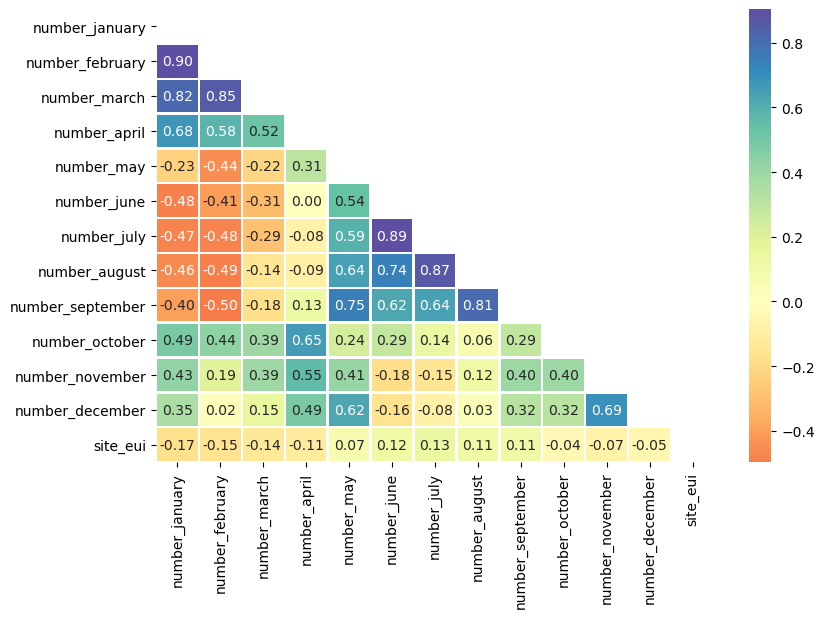

In [55]:
correlation = df[['number_january','number_february','number_march','number_april','number_may','number_june',
                  'number_july','number_august','number_september','number_october', 'number_november',
                  'number_december','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(9,6), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

### 2.7 total_number

In [33]:
df['total_number'] = df.apply(lambda row:
                             row.number_december + row.number_november + row.number_october + row.number_september + row.number_august + row.number_july
                             + row.number_june + row.number_may + row.number_april + row.number_march + row.number_february + row.number_january, axis=1)

### 2.8 number_season (4x)

In [34]:
df['number_winter'] = df.apply(lambda row:
                             row.number_march + row.number_february + row.number_january, axis=1)
df['number_spring'] = df.apply(lambda row:
                             + row.number_june + row.number_may + row.number_april, axis=1)
df['number_summer'] = df.apply(lambda row:
                             row.number_september + row.number_august + row.number_july, axis=1)
df['number_autumn'] = df.apply(lambda row:
                             row.number_december + row.number_november + row.number_october, axis=1)

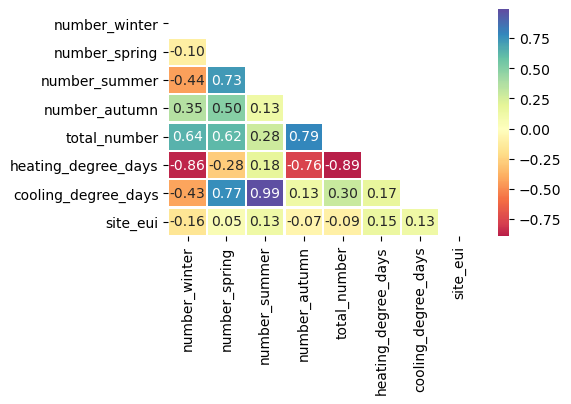

In [58]:
correlation = df[['number_winter','number_spring','number_summer','number_autumn','total_number','heating_degree_days','cooling_degree_days','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(5,3), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

### 2.9 eui_improved

In [59]:
def bool_eui_BUILD(row):
    temp_df = df[df['building_id'] ==  row.building_id]
    e_star = temp_df['site_eui'].to_list()
    bool_star = e_star[-1] - e_star[0]
    if bool_star > 0:
        prev_e_star = 1
    elif bool_star == 0:
        prev_e_star = 0
    else:
        prev_e_star = -1
    
    return prev_e_star

In [60]:
df['eui_improved'] = df.apply(bool_eui_BUILD, axis =1)

### 2.10 eui_diff

In [61]:
def diff_eui(row):
    temp_df = df[df['building_id'] ==  row.building_id]
    years = temp_df['year_factor'].to_list()
    e_star = temp_df['site_eui'].to_list()
    if len(years) > 1:
        years_2 = [x for x in years if x < row.year_factor]
        if len(years_2) > 0:
            prev_e_star = row.site_eui - e_star[years.index(max(years_2))]
        else:
            prev_e_star = 0
    else:
        prev_e_star = 0
    
    return prev_e_star

In [62]:
df['eui_diff'] = df.apply(diff_eui, axis =1)

In [63]:
df['eui_diff'] = df.eui_diff.fillna(0)

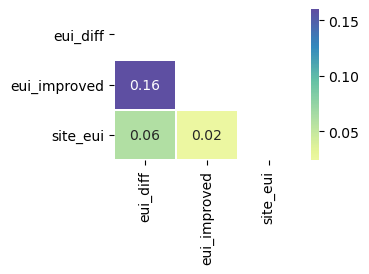

In [64]:
correlation = df[['eui_diff','eui_improved','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(3,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

### 2.11 hdd_extreme
#### 2.11 A hdd_extreme

In [65]:
def hdd(row):
    hdd = 0 
    if row.january_avg_temp < 65:
        hdd += 65 - row.january_avg_temp
    if row.january_min_temp < 65:
        hdd += 65 - row.january_min_temp    
    
    if row.february_avg_temp < 65:
        hdd += 65 - row.february_avg_temp
    if row.february_min_temp < 65:
        hdd += 65 - row.february_min_temp
    
    if row.march_avg_temp <65:
        hdd += 65 - row.march_avg_temp
    if row.march_min_temp < 65:
        hdd += 65 - row.march_min_temp
        
    if row.april_avg_temp < 65:
        hdd += 65 - row.april_avg_temp
    if row.april_min_temp < 65:
        hdd += 65 - row.april_min_temp
    
    if row.may_avg_temp < 65:
        hdd += 65 - row.may_avg_temp
    if row.may_min_temp < 65:
        hdd += 65 - row.may_min_temp
        
    if row.june_avg_temp < 65:
        hdd += 65 - row.june_avg_temp
    if row.june_min_temp < 65:
        hdd += 65 - row.june_min_temp
        
    if row.july_avg_temp < 65:
        hdd += 65 - row.july_avg_temp
    if row.july_min_temp < 65:
        hdd += 65 - row.july_min_temp
    
    if row.august_avg_temp < 65:
        hdd += 65 - row.august_avg_temp
    if row.august_min_temp < 65:
        hdd += 65 - row.august_min_temp
        
    if row.september_avg_temp < 65:
        hdd += 65 - row.september_avg_temp
    if row.september_min_temp < 65:
        hdd += 65 - row.september_min_temp
    
    if row.october_avg_temp < 65:
        hdd += 65 - row.october_avg_temp
    if row.october_min_temp < 65:
        hdd += 65 - row.october_min_temp
        
    if row.november_avg_temp < 65:
        hdd += 65 - row.november_avg_temp
    if row.november_min_temp < 65:
        hdd += 65 - row.november_min_temp
    
    if row.december_avg_temp < 65:
        hdd += 65 - row.december_avg_temp
    if row.december_min_temp < 65:
        hdd += 65 - row.december_min_temp
        
    return hdd

In [66]:
df['hdd_extreme'] = df.apply(hdd, axis=1)

#### 2.11 B hdd_extreme_2

In [67]:
def hdd_2ext(row):
    hdd = 0 
    if row.january_avg_temp < 65:
        hdd += 65 - row.january_avg_temp
    if row.january_min_temp < 65:
        hdd += (65 - row.january_min_temp)*2
    
    if row.february_avg_temp < 65:
        hdd += 65 - row.february_avg_temp
    if row.february_min_temp < 65:
        hdd += (65 - row.february_min_temp)*2
    
    if row.march_avg_temp <65:
        hdd += 65 - row.march_avg_temp
    if row.march_min_temp < 65:
        hdd += (65 - row.march_min_temp)*2
        
    if row.april_avg_temp < 65:
        hdd += 65 - row.april_avg_temp
    if row.april_min_temp < 65:
        hdd += (65 - row.april_min_temp)*2
    
    if row.may_avg_temp < 65:
        hdd += 65 - row.may_avg_temp
    if row.may_min_temp < 65:
        hdd += (65 - row.may_min_temp)*2
        
    if row.june_avg_temp < 65:
        hdd += 65 - row.june_avg_temp
    if row.june_min_temp < 65:
        hdd += (65 - row.june_min_temp)*2
        
    if row.july_avg_temp < 65:
        hdd += 65 - row.july_avg_temp
    if row.july_min_temp < 65:
        hdd += (65 - row.july_min_temp)*2
    
    if row.august_avg_temp < 65:
        hdd += 65 - row.august_avg_temp
    if row.august_min_temp < 65:
        hdd += (65 - row.august_min_temp)*2
        
    if row.september_avg_temp < 65:
        hdd += 65 - row.september_avg_temp
    if row.september_min_temp < 65:
        hdd += (65 - row.september_min_temp)*2
    
    if row.october_avg_temp < 65:
        hdd += 65 - row.october_avg_temp
    if row.october_min_temp < 65:
        hdd += (65 - row.october_min_temp)*2
        
    if row.november_avg_temp < 65:
        hdd += 65 - row.november_avg_temp
    if row.november_min_temp < 65:
        hdd += (65 - row.november_min_temp)*2
    
    if row.december_avg_temp < 65:
        hdd += 65 - row.december_avg_temp
    if row.december_min_temp < 65:
        hdd += (65 - row.december_min_temp)*2
        
    return hdd

In [68]:
df['hdd_extreme_2'] = df.apply(hdd_2ext, axis=1)

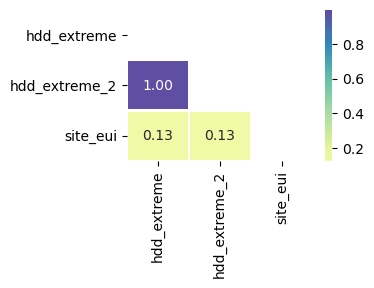

In [69]:
correlation = df[['hdd_extreme','hdd_extreme_2','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(3,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

### 2.12 calculated_eui
#### 2.12 avg_total_number_building

In [70]:
building_id_list = df['building_id'].unique()

def temp_number_building(row):
    temp_df = df[df['building_id'] ==  row.building_id]
    total_numbers = temp_df['total_number'].to_list()
    total_number_sum =0
    for x in total_numbers:
        total_number_sum += x
    
    return total_number_sum/len(total_numbers)

In [71]:
df['avg_total_number_building'] = df.apply(temp_number_building, axis=1)

#### 2.12 avg_eui_building
Heeft nog 719 np.nan values maar kan gebruikt worden voor het eventueel mean encoden van building_id

In [72]:
def average_eui_building(row):
    temp_df = df[df['building_id'] ==  row.building_id]
    total_euis = temp_df['site_eui'].to_list()
    total_euis = [x for x in total_euis if x==x]
    total_eui = 0
    for x in total_euis:
        total_eui += x
    if len(total_euis) > 0:
        return total_eui/len(total_euis)
    else:
        return np.nan

In [73]:
df['avg_eui_building'] = df.apply(average_eui_building, axis=1)

In [74]:
df['avg_total_number_building_DIV_avg_eui_building'] = df.apply(lambda row: row.avg_total_number_building/row.avg_eui_building, axis=1)

#### 2.12 year_built_bin

In [75]:
cut_labels = [1, 2, 3, 4, 5]
cut_bins = [0,  1930, 1950, 1970, 1990, 2022]
df['year_built_bin'] = pd.cut(df['year_built'], bins=cut_bins, labels=cut_labels)
df['year_built_bin'] = df['year_built_bin'].astype('int')

In [76]:
def create_feature2(row):
    temp_df = df[df['year_built_bin'] == row.year_built_bin]
    temp_df_eui_list = temp_df['site_eui'].to_list()
    temp_df_eui_list.sort()
    p1 = np.nanpercentile(temp_df_eui_list, 25, axis=0)
    p3 = np.nanpercentile(temp_df_eui_list, 75, axis=0)
    InterQ = abs(p3-p1)
    if row.site_eui < (p1 - (1.5*InterQ)):
        return 1
    elif row.site_eui > (p3 + (1.5*InterQ)):
        return 3
    else:
        return 2

In [77]:
df['yearB_E_int']= df.apply(create_feature2, axis=1)

#### 2.12 calculated_eui

In [78]:
df.isna().sum().sort_values(ascending=False)

site_eui                                          9705
avg_total_number_building_DIV_avg_eui_building     716
avg_eui_building                                   716
year_factor                                          0
peak_NW                                              0
                                                  ... 
september_avg_temp                                   0
september_min_temp                                   0
august_max_temp                                      0
august_avg_temp                                      0
yearB_E_int                                          0
Length: 103, dtype: int64

In [79]:
df['calculated_eui'] = df.apply(lambda row: row.total_number / row.avg_total_number_building_DIV_avg_eui_building, axis=1)

In [80]:
temp_df = df.groupby(['facility_type','year_built_bin'])['site_eui'].mean()
temp_df = temp_df.reset_index()
temp_df.head()

,facility_type,year_built_bin,site_eui
0,2to4_Unit_Building,1,44.290212
1,2to4_Unit_Building,2,36.697574
2,2to4_Unit_Building,3,28.579536
3,2to4_Unit_Building,4,26.166490
4,2to4_Unit_Building,5,31.317190


In [81]:
def calculated_eui(row):
    if row.calculated_eui != row.calculated_eui:
        return temp_df[(temp_df['facility_type'] == row.facility_type) & (temp_df['year_built_bin'] == row.year_built_bin)]['site_eui'].values[0]
    else:
        return row.calculated_eui

In [82]:
df['calculated_eui'] = df.apply(calculated_eui, axis=1)

In [83]:
def calculated_eui_2(row):
    if row.calculated_eui != row.calculated_eui:
        return temp_df[(temp_df['facility_type'] == row.facility_type)]['site_eui'].values[0]
    else:
        return row.calculated_eui

In [84]:
df['calculated_eui'] = df.apply(calculated_eui_2, axis=1)

In [85]:
df['calculated_eui'] = df['calculated_eui'].fillna(df['calculated_eui'].median())

In [86]:
del df['avg_total_number_building_DIV_avg_eui_building']

### 2.13 calc_eui_perc_off

In [87]:
def percentage_off(row):
    diff_eui = row.site_eui - row.calculated_eui
    perc = diff_eui/row.site_eui
    return perc*-1

In [88]:
df['calc_eui_perc_off'] = df.apply(percentage_off, axis=1)

In [89]:
def fill_calc_eui_perc_off(row):
    if row.calc_eui_perc_off != row.calc_eui_perc_off:
        df_temp = df[df['building_id'] == row.building_id]
        list_calc_eui_perc_off = df_temp['calc_eui_perc_off'].to_list()
        list_calc_eui_perc_off = list_calc_eui_perc_off[:-1]
        if len(list_calc_eui_perc_off) >1:
            #print(list_calc_eui_perc_off)
            return sum(list_calc_eui_perc_off) / len(list_calc_eui_perc_off)
        else:
            return np.nan
    else:
        return row.calc_eui_perc_off

In [90]:
df['calc_eui_perc_off'] = df.apply(fill_calc_eui_perc_off, axis=1)

In [91]:
df['calc_eui_perc_off'] = df['calc_eui_perc_off'].fillna(df['calc_eui_perc_off'].mean())

### 2.14 binned_calc_eui
#### 2.14 binned_calc_eui

In [92]:
list_eui = df['calculated_eui'].to_list()
p0 = np.percentile(list_eui, 0)
p1 = np.percentile(list_eui, 10)
p2 = np.percentile(list_eui, 20)
p3 = np.percentile(list_eui, 30)
p4 = np.percentile(list_eui, 40)
p5 = np.percentile(list_eui, 50)
p6 = np.percentile(list_eui, 60)
p7 = np.percentile(list_eui, 70)
p8 = np.percentile(list_eui, 80)
p9 = np.percentile(list_eui, 90)
p10 = np.percentile(list_eui, 100)
 
bins = [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
labels = [1,2,3,4,5,6,7,8,9,10]

In [93]:
df['binned_calc_eui'] = pd.cut(df['calculated_eui'], bins=bins, labels=labels)
df['binned_calc_eui'] = df['binned_calc_eui'].fillna(1)
df['binned_calc_eui'] = df.binned_calc_eui.astype('int64')

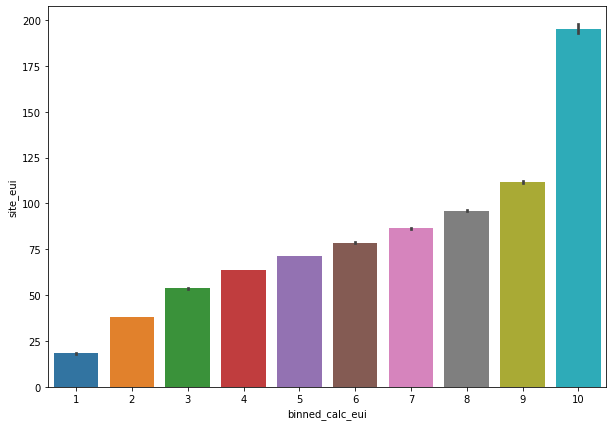

In [94]:
plt.rcParams["figure.figsize"] = (10,7)
ax = sns.barplot(x="binned_calc_eui", y="site_eui", data=df)

#### 2.14 binned_calc_eui_20

In [95]:
list_eui = df['calculated_eui'].to_list()
p0 = np.percentile(list_eui, 0)
p1 = np.percentile(list_eui, 5)
p2 = np.percentile(list_eui, 10)
p3 = np.percentile(list_eui, 15)
p4 = np.percentile(list_eui, 20)
p5 = np.percentile(list_eui, 25)
p6 = np.percentile(list_eui, 30)
p7 = np.percentile(list_eui, 35)
p8 = np.percentile(list_eui, 40)
p9 = np.percentile(list_eui, 45)
p10 = np.percentile(list_eui, 50)
p11 = np.percentile(list_eui, 55)
p12 = np.percentile(list_eui, 60)
p13 = np.percentile(list_eui, 65)
p14 = np.percentile(list_eui, 70)
p15 = np.percentile(list_eui, 75)
p16 = np.percentile(list_eui, 80)
p17 = np.percentile(list_eui, 85)
p18 = np.percentile(list_eui, 90)
p19 = np.percentile(list_eui, 95)
p20 = np.percentile(list_eui, 100)
 
bins = [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [96]:
df['binned_calc_eui_20'] = pd.cut(df['calculated_eui'], bins=bins, labels=labels)
df['binned_calc_eui_20'] = df['binned_calc_eui_20'].fillna(1)
df['binned_calc_eui_20'] = df.binned_calc_eui.astype('int64')

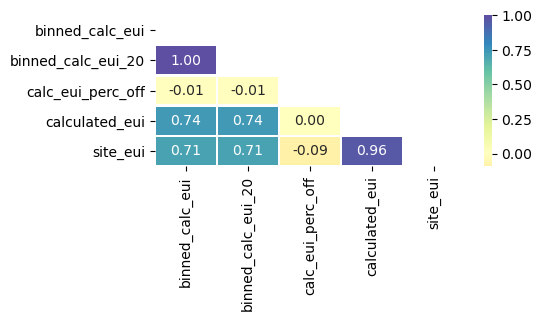

In [97]:
correlation = df[['binned_calc_eui','binned_calc_eui_20','calc_eui_perc_off','calculated_eui','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(5,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

### 2.15 verschil_uitstoot_per_temp_tov_jaar_state

In [35]:
table = pd.pivot_table(df, values=['january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp','heating_degree_days','cooling_degree_days','total_number',
 'number_winter',
 'number_spring',
 'number_summer',
 'number_autumn','site_eui'], index=['state_factor', 'year_factor'],
                    aggfunc={'january_min_temp': np.mean ,
 'january_avg_temp': np.mean,
 'january_max_temp': np.mean,
 'february_min_temp': np.mean,
 'february_avg_temp': np.mean,
 'february_max_temp': np.mean,
 'march_min_temp': np.mean,
 'march_avg_temp': np.mean,
 'march_max_temp': np.mean,
 'april_min_temp': np.mean,
 'april_avg_temp': np.mean,
 'april_max_temp': np.mean,
 'may_min_temp': np.mean,
 'may_avg_temp': np.mean,
 'may_max_temp': np.mean,
 'june_min_temp': np.mean,
 'june_avg_temp': np.mean,
 'june_max_temp': np.mean,
 'july_min_temp': np.mean,
 'july_avg_temp': np.mean,
 'july_max_temp': np.mean,
 'august_min_temp': np.mean,
 'august_avg_temp': np.mean,
 'august_max_temp': np.mean,
 'september_min_temp': np.mean,
 'september_avg_temp': np.mean,
 'september_max_temp': np.mean,
 'october_min_temp': np.mean,
 'october_avg_temp': np.mean,
 'october_max_temp': np.mean,
 'november_min_temp': np.mean,
 'november_avg_temp': np.mean,
 'november_max_temp': np.mean,
 'december_min_temp': np.mean,
 'december_avg_temp': np.mean,
 'december_max_temp': np.mean,
 'heating_degree_days': np.mean,
 'cooling_degree_days': np.mean,'total_number': np.mean,
 'number_winter': np.mean,
 'number_spring': np.mean,
 'number_summer': np.mean,
 'number_autumn': np.mean, 'site_eui': np.mean})

In [36]:
table = table.reset_index()

In [37]:
table

,state_factor,year_factor,april_avg_temp,april_max_temp,april_min_temp,august_avg_temp,august_max_temp,august_min_temp,cooling_degree_days,december_avg_temp,...,number_summer,number_winter,october_avg_temp,october_max_temp,october_min_temp,september_avg_temp,september_max_temp,september_min_temp,site_eui,total_number
0,State_1,1,55.500000,78.000000,41.000000,62.161290,85.000000,52.000000,115.000000,49.274194,...,5823.496350,4654.161250,63.016129,83.000000,47.000000,64.650000,90.000000,52.000000,70.148330,20836.972300
1,State_1,2,58.966416,89.877941,36.927941,72.491224,100.123529,52.408824,872.120588,48.139354,...,6529.767616,4621.379011,64.253925,99.764706,43.182353,69.176656,97.291176,49.491176,66.543553,22140.545271
2,State_1,3,60.217771,87.844605,36.847021,69.487742,94.402576,49.250403,640.805958,45.205850,...,6336.734571,4476.664246,59.099922,85.400966,38.419485,67.863899,96.642512,44.437198,60.261259,21513.691395
3,State_1,4,60.524645,90.264076,45.635210,68.575825,83.245837,57.236320,707.289453,56.148588,...,6346.894880,5085.608160,68.316349,94.915940,53.067407,69.414209,86.038858,55.398097,58.362694,22877.366604
4,State_1,5,60.966667,91.000000,41.000000,74.774194,104.000000,58.000000,1319.000000,48.580645,...,6848.484400,5089.055550,69.580645,96.000000,49.000000,73.583333,105.000000,53.000000,63.259263,23167.388150
5,State_1,6,60.283333,86.000000,47.000000,63.790323,76.000000,53.000000,142.000000,50.661290,...,5880.955150,5018.946600,63.354839,84.000000,51.000000,64.800000,94.000000,52.000000,62.512324,21801.495450
6,State_1,7,58.450000,78.000000,45.000000,65.854839,88.000000,53.000000,342.000000,51.887097,...,6139.393600,4860.146350,64.193548,91.000000,48.000000,69.766667,104.000000,54.000000,NaN,21892.417400
7,State_10,3,58.883333,91.000000,31.000000,77.080645,94.000000,60.000000,1719.000000,42.290323,...,7048.078850,3683.881700,62.403226,91.000000,35.000000,71.316667,94.000000,51.000000,93.232511,21509.816550
8,State_10,4,57.333333,85.000000,34.000000,77.661290,96.000000,62.000000,1712.000000,43.725806,...,7085.464150,3390.677400,62.887097,82.000000,44.000000,73.833333,95.000000,54.000000,68.255412,21385.916899
9,State_10,5,59.383333,84.000000,39.000000,79.274194,96.000000,63.000000,1999.000000,51.177419,...,7229.964750,3362.207250,58.854839,79.000000,37.000000,74.866667,96.000000,55.000000,61.224291,22008.001150


<AxesSubplot:xlabel='total_number', ylabel='site_eui'>

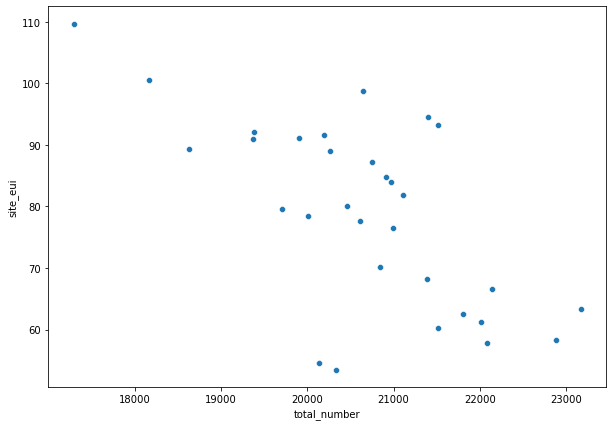

In [100]:
sns.scatterplot(data=table, x="total_number", y="site_eui")

In [101]:
# uitstoot per temperatuur
table['avg_eui_totalNO'] = table.apply(lambda row: row.site_eui/row.total_number *100, axis=1)

In [102]:
# uitstoot per temperatuur
df['avg_eui_totalNO'] = df.apply(lambda row: row.site_eui/row.total_number *100, axis=1)

In [103]:
def calc_difference_uitstoot_per_temp_tov_jaar_state(row):
    return row.avg_eui_totalNO - table[(table['state_factor'] == row.state_factor) & (table['year_factor'] == row.year_factor)]['avg_eui_totalNO'].values[0]

df['verschil_uitstoot_per_temp_tov_jaar_state']= df.apply(calc_difference_uitstoot_per_temp_tov_jaar_state, axis=1)

<AxesSubplot:xlabel='verschil_uitstoot_per_temp_tov_jaar_state', ylabel='Count'>

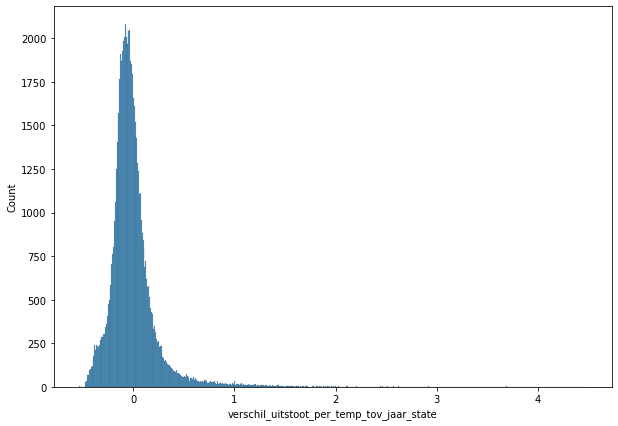

In [104]:
sns.histplot(data=df, x="verschil_uitstoot_per_temp_tov_jaar_state")

In [105]:
def get_verschil_uitstoot_per_temp_tov_jaar_state_from_building(row):
    if row.verschil_uitstoot_per_temp_tov_jaar_state == row.verschil_uitstoot_per_temp_tov_jaar_state:
        return row.verschil_uitstoot_per_temp_tov_jaar_state
    else:
        temp_df = df[df['building_id'] == row.building_id]
        temp_df_list = temp_df['verschil_uitstoot_per_temp_tov_jaar_state'].to_list()
        if len(temp_df_list) > 1:
            return temp_df_list[-2]
        else:
            return 0

df['verschil_uitstoot_per_temp_tov_jaar_state'] = df.apply(get_verschil_uitstoot_per_temp_tov_jaar_state_from_building, axis=1)

In [106]:
df['verschil_uitstoot_per_temp_tov_jaar_state'] = df['verschil_uitstoot_per_temp_tov_jaar_state'].fillna(0)

In [107]:
del df['avg_eui_totalNO']

### 2.16 StateYear_E_Int

In [108]:
state_dict ={}
def create_feature():
    for x in df['state_factor'].unique():
        temp_df = df[df['state_factor'] == x]
        temp_df_list = temp_df['verschil_uitstoot_per_temp_tov_jaar_state'].to_list()
        temp_df_list.sort()
        p1 = np.nanpercentile(temp_df_list, 25, axis=0)
        p3 = np.nanpercentile(temp_df_list, 75, axis=0)
        InterQ = abs(p3-p1)
        state_dict[x] = [p1,p3,InterQ]

create_feature()
state_dict

{'State_1': [-0.14397914926889885, 0.044751209585454865, 0.1887303588543537],
 'State_2': [-0.11878063777956323, 0.04097145627061849, 0.1597520940501817],
 'State_4': [-0.16076011020040304, 0.0422102516561606, 0.20297036185656364],
 'State_6': [-0.11509766097313048, 0.06447219601445692, 0.1795698569875874],
 'State_8': [-0.20803747732214825, 0.0653155080397419, 0.2733529853618901],
 'State_10': [-0.04954064622170248, 0.023568890988139468, 0.07310953720984195],
 'State_11': [-0.13934786247281813, 0.018683777384450595, 0.15803163985726873]}

In [109]:
df['StateYear_E_Int'] = df.apply(lambda row: 1 if row.verschil_uitstoot_per_temp_tov_jaar_state < (state_dict[row.state_factor][0]-state_dict[row.state_factor][2]) else
                                3 if row.verschil_uitstoot_per_temp_tov_jaar_state > (1.5* state_dict[row.state_factor][2] + state_dict[row.state_factor][1]) else 
                                 2 if (row.verschil_uitstoot_per_temp_tov_jaar_state > (state_dict[row.state_factor][0]-state_dict[row.state_factor][2])) & (row.verschil_uitstoot_per_temp_tov_jaar_state < (1.5* state_dict[row.state_factor][2] + state_dict[row.state_factor][1])) else np.nan 
                                 , axis=1)

In [110]:
def get_StateYear_E_Int_from_building(row):
    if row.StateYear_E_Int == row.StateYear_E_Int:
        return row.StateYear_E_Int
    else:
        temp_df = df[df['building_id'] == row.building_id]
        temp_df_list = temp_df['StateYear_E_Int'].to_list()
        if len(temp_df_list) > 1:
            return temp_df_list[-2]
        else:
            return 2

df['StateYear_E_Int'] = df.apply(get_StateYear_E_Int_from_building, axis=1)

In [111]:
df['StateYear_E_Int'] = df['StateYear_E_Int'].fillna(2)

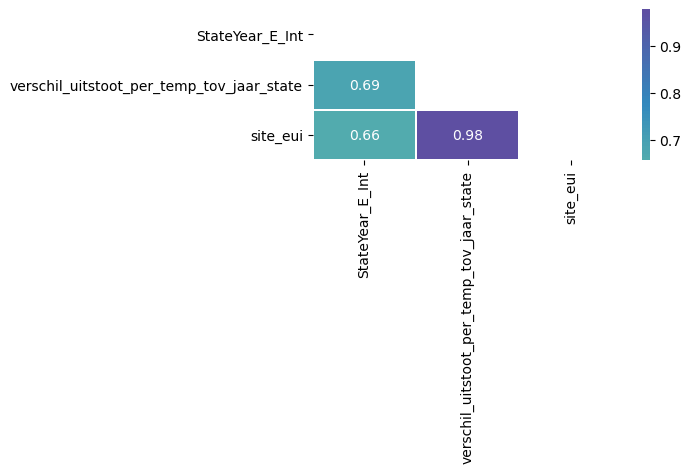

In [112]:
correlation = df[['StateYear_E_Int','verschil_uitstoot_per_temp_tov_jaar_state','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(5,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

In [113]:
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,avg_total_number_building,avg_eui_building,year_built_bin,yearB_E_int,calculated_eui,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,22078.118536,245.522877,2,3,231.720532,-0.068208,10,10,0.856815,3
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,22078.118536,27.609132,3,2,26.057054,-0.016720,1,1,-0.209475,2
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,22068.147067,23.481589,3,2,22.171559,-0.102134,1,1,-0.218145,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,22050.354236,43.272466,4,2,40.891278,-0.155260,2,2,-0.104341,2
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,22109.068725,5.196438,4,2,4.897449,0.255951,1,1,-0.317939,2


In [114]:
df.isna().sum().sort_values(ascending=False)

site_eui              9705
avg_eui_building       716
year_factor              0
max_SW                   0
number_february          0
                      ... 
september_max_temp       0
september_avg_temp       0
september_min_temp       0
august_max_temp          0
StateYear_E_Int          0
Length: 108, dtype: int64

In [115]:
df.to_csv("C:/Users/Meyke/WiDS/data/features_data_0402_imputed_star_rating_and_generous_building_id.csv")